In [225]:
from data_180218 import load_data
from spot2intensity import Spots
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy
from utils import ensure_dir
import numpy as np
from correlation_significance import correlated_significance
import statsmodels.api as sm
from scipy.interpolate import interp1d



In [2]:
collections = load_data()

In [3]:
cs_vir1_names = ["slide_21","slide_22","slide_23","slide_24","slide_25"]
cs_vir2_names = ["slide_26","slide_27","slide_28","slide_29","slide_30"]
cs_vir3_names = ["slide_31","slide_32","slide_33","slide_34","slide_35"]
cs_vir4_names = ["slide_36","slide_37","slide_39","slide_40"]
cs_vir5_names = ["slide_41","slide_42","slide_44","slide_45"]

cs_vir1={collections[c]:"HongKong/4801/2014" for c in cs_vir1_names}
cs_vir2={collections[c]:"Brisbaine/59/2007" for c in cs_vir2_names}
cs_vir3={collections[c]:"Cal" for c in cs_vir3_names}
cs_vir4={collections[c]:"Brisbaine/10/2007" for c in cs_vir4_names}
cs_vir5={collections[c]:"X31" for c in cs_vir5_names}

collections_dict = {}
frames = []

for d in [cs_vir1,cs_vir2,cs_vir3,cs_vir4,cs_vir5]:
    for k, v in d.iteritems():
        collections_dict[k] = v
viruses = set(collections_dict.values())
virus_combinations = list(combinations(viruses,2))

In [48]:
frames = []
for c, virus in collections_dict.iteritems():
    spots_c = Spots.load_pickel(c)
    spots_c.select_by_circlequal(0.3)
    spots_c.add_virus(virus)
    spots_c.add_c_name(c.name)
    frames.append(spots_c.df)
spots = pd.concat(frames)




405
167


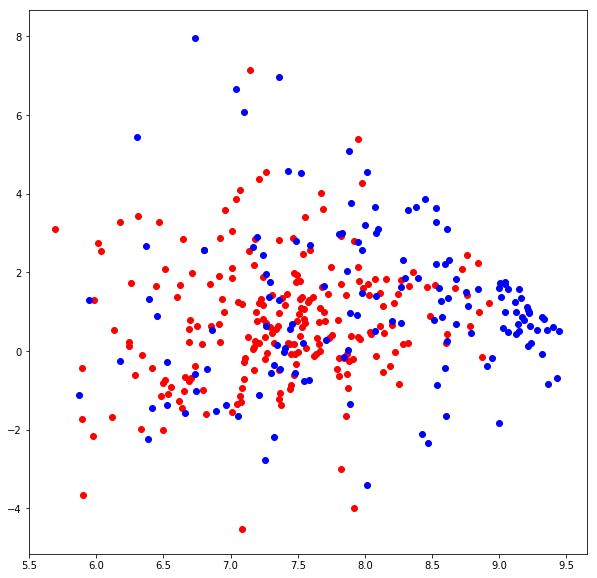

In [49]:
c1 =  spots[spots["Collection"] == "slide_21"]
c2 = spots[spots["Collection"] == "slide_23"]




cond = abs(np.log2(c1["intensities2"]/c2["intensities2"]))<1
ncond = np.invert(cond)
cond1 = c1["Name"].isin(["Pep_80","Pep_43","Pep_49","Pep_50","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad"])
cond2 = c2["Name"].isin(["Pep_80","Pep_43","Pep_49","Pep_50","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad"])
ncond1 = np.invert(cond1)
ncond2 = np.invert(cond2)

display()
x1 = np.log10(c1.loc[ncond1]["intensities2"]*c2.loc[ncond2]["intensities2"])
y1 = np.log2(c1.loc[ncond1]["intensities2"]/c2.loc[ncond2]["intensities2"])
x2 = np.log10(c1.loc[cond1]["intensities2"]*c2.loc[cond2]["intensities2"])
y2 = np.log2(c1.loc[cond1]["intensities2"]/c2.loc[cond2]["intensities2"])


print(len(x1))
print(len(x2))


plt.figure(figsize=(10,10))
plt.scatter(x1,y1, color = "r")
plt.scatter(x2,y2, color = "b")

plt.show()

In [67]:
c1.index

Int64Index([ 16,  17,  19,  20,  27,  28,  29,  30,  31,  32,
            ...
            798, 799, 800, 801, 802, 804, 805, 806, 816, 822],
           dtype='int64', name=u'ID', length=444)

In [224]:
x1= np.log10(c1n["intensities2"]*c2n["intensities2"])
y1 = np.log2(c1n["intensities2"]/c2n["intensities2"])
lowess = sm.nonparametric.lowess(y1, x1, frac=0.33)
print(lowess.shape)
print(y1.shape)



(4017, 2)
(4044,)


/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(3810, 1191)


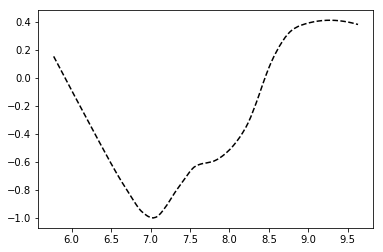

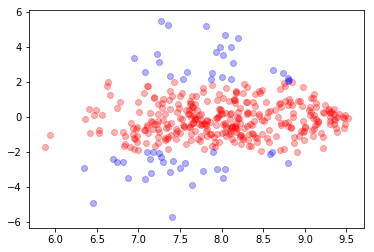

In [265]:
c1 =  spots[spots["Collection"] == "slide_21"]
c2 = spots[spots["Collection"] == "slide_24"]

c1["Pep"]=c1["Name"]
c2["Pep"]=c2["Name"]

c1n = c1.set_index(["Name"])
c2n = c2.set_index(["Name"])

x1= np.log10(c1n["intensities2"]*c2n["intensities2"])
y1 = np.log2(c1n["intensities2"]/c2n["intensities2"])

x= np.log10(c1["intensities2"]*c2["intensities2"])
y = np.log2(c1["intensities2"]/c2["intensities2"])

cond = abs(np.log2(c1n["intensities2"]/c2n["intensities2"]))<2
ncond = np.invert(cond)
print(len(x1[cond]),len(x1[ncond]))

df = cond.reset_index()
df.groupby("Name").agg(['mean', 'count']).sort_values(by=("intensities2", "mean"), ascending=False)
#plt.scatter(x1[cond],y1[cond],c="r", alpha=0.3)
#plt.scatter(x1[ncond],y1[ncond],c="b", alpha=0.3)
lowess = sm.nonparametric.lowess(y1, x1, frac=0.33)
f = interp1d(lowess[:,0],lowess[:,1], bounds_error=False)
cond = abs(y-f(x))< 2
ncond = np.invert(cond)
plt.plot(x1.sort_values(),f(x1.sort_values()),"--", c="k")
plt.show()
plt.scatter(x[cond],y[cond]-f(x[cond]),c="r", alpha=0.3)
plt.scatter(x[ncond],y[ncond]-f(x[ncond]),c="b", alpha=0.3)


plt.show()




In [266]:
cond = abs(y1-f(x1))< 2
ncond = np.invert(cond)
print(len(x1[cond]),len(x1[ncond]))


(3951, 1050)


In [187]:
 df = pd.DataFrame(n1.Row.str.split(",",1).tolist(),
                                   columns = ['flips','row'])

AttributeError: 'DataFrame' object has no attribute 'Row'

In [189]:
n1= pd.concat([cond, c1n["Row"].astype(str)+","+c2n["Row"].astype(str)],ignore_index=True, axis=1, levels=["rows","cols"])
#pd.DataFrame(n1[1].str.split(",").tolist(),columns=["R1","R2"])
#c1n["Row"].astype(str)+","+c2n["Row"].astype(str), con


In [201]:
#df = pd.DataFrame(n1.rows.str.split(",",1).tolist(),columns = ['flips','row'])

TypeError: descriptor 'split' of 'str' object needs an argument